### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 3


### Дисциплина: Информационный анализ данных

##### Студент:  Ильин Никита 
##### Группа:   НФИбд-01-19

## Москва 2022
***

Вариант 22 

Spambase Data Set 

Название файла: spambase.data 

Ссылка: http://archive.ics.uci.edu/ml/datasets/Spambase 

Первый признак: capital_run_length_average (столбец No 55) 

Второй признак: capital_run_length_longest (столбец No 56) 

Класс: spam (столбец No 58) 

Алгоритмы: K-means, Affinity Propagation, Mean Shift, mini-batch K-Means 

Меры качества: Чистота (purity), парные меры TP, FN, FP, TN, индекс Фоулкса – Мэллоуса 

Найти лучший алгоритм кластеризации относительно меры качества: индекс Фоулкса – Мэллоуса 

## Задание

Для закрепленного за Вами варианта лабораторной работы:

1.	Считайте из заданного набора данных репозитария UCI значения двух признаков и метки класса. 

2.	Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените их на медианные значения того класса, к которому относится запись с пропущенным значением в признаке.

3.	Если количество различных меток класса больше пяти, то объедините некоторые (наименее многочисленные) классы, чтобы общее количество классов не превышало семь. 

4.	Визуализируйте набор данных в виде точек плоскости с координатами, соответствующими двум признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 

5.	Проведите кластеризацию набора данных из двух признаков с помощью алгоритмов, указанных в индивидуальном задании, для случая, когда количество кластеров равно количеству классов в исходном наборе (с учетом корректировки). В случае отсутствия сходимости алгоритма измените аргументы по умолчанию или используйте для кластеризации случайную выборку из набора данных.

6.	Для каждого из алгоритмов кластеризации, указанных в индивидуальном задании, постройте матрицу сопряженности, используя функцию `contingency_matrix()` из scikit-learn, и найдите значения мер качества кластеризации, указанные в индивидуальном задании.  

7.	Определите алгоритм кластеризации, оптимальный с точки зрения меры качества кластеризации, указанной в индивидуальном задании.

8.	Для оптимального алгоритма кластеризации из предыдущего пункта визуализируйте области принятия решения и набор данных в виде точек на плоскости с координатами, соответствующими двум признакам, отображая точки различных кластеров разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 

### Выполнение

1.	Считайте из заданного набора данных репозитария UCI значения двух признаков и метки класса. 


In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# считываем данные в объект DataFrame
data = pd.read_csv("spambase.data", sep=",", header = None)[[54, 55, 57]]
data

,54,55,57
0,3.756,61,1
1,5.114,101,1
2,9.821,485,1
3,3.537,40,1
4,3.537,40,1
...,...,...,...
4596,1.142,3,0
4597,1.555,4,0
4598,1.404,6,0
4599,1.147,5,0



2.	Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените их на медианные значения того класса, к которому относится запись с пропущенным значением в признаке.


In [71]:
data.isnull().sum(axis=0)

54    0
55    0
57    0
dtype: int64


3.	Если количество различных меток класса больше пяти, то объедините некоторые (наименее многочисленные) классы, чтобы общее количество классов не превышало семь. 


In [72]:
data.groupby(57).count()

,54,55
57,,
0,2788,2788
1,1813,1813



4.	Визуализируйте набор данных в виде точек плоскости с координатами, соответствующими двум признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 


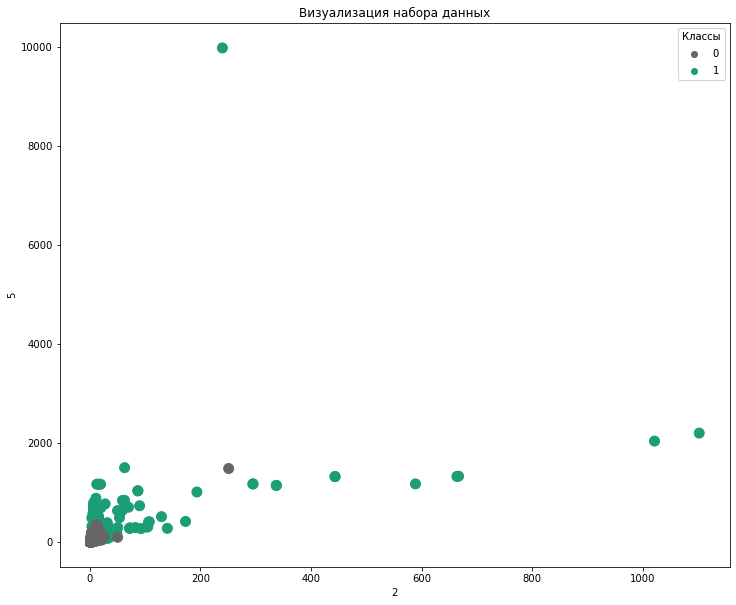

In [73]:
X = data[[54, 55]].to_numpy()
Y = data[57].to_numpy()

fig, ax = plt.subplots(figsize=(12,10))
scatter = ax.scatter(X[:,0], X[:,1], s=100, c=Y, cmap=plt.cm.Dark2_r);

ax.set_xlabel("2")
ax.set_ylabel("5")
ax.set_title("Визуализация набора данных")

legend1 = ax.legend(*scatter.legend_elements(), title="Классы")
ax.add_artist(legend1)


5.	Проведите кластеризацию набора данных из двух признаков с помощью алгоритмов, указанных в индивидуальном задании, для случая, когда количество кластеров равно количеству классов в исходном наборе (с учетом корректировки). В случае отсутствия сходимости алгоритма измените аргументы по умолчанию или используйте для кластеризации случайную выборку из набора данных.


In [74]:
def plot_cluster(X,y): 
    plt.figure(figsize=(12,10)) 
    clusters = np.unique(y) 
    for cluster in clusters: 
        row_ix = np.where(y == cluster) 
        plt.scatter(X[row_ix, 0], X[row_ix, 1],s=100,label=cluster)         
    plt.xlabel("55") 
    plt.ylabel("56") 
    plt.title("Визуализация набора данных, разделенного на кластеры") 
    plt.legend(); 
    plt.grid(True)

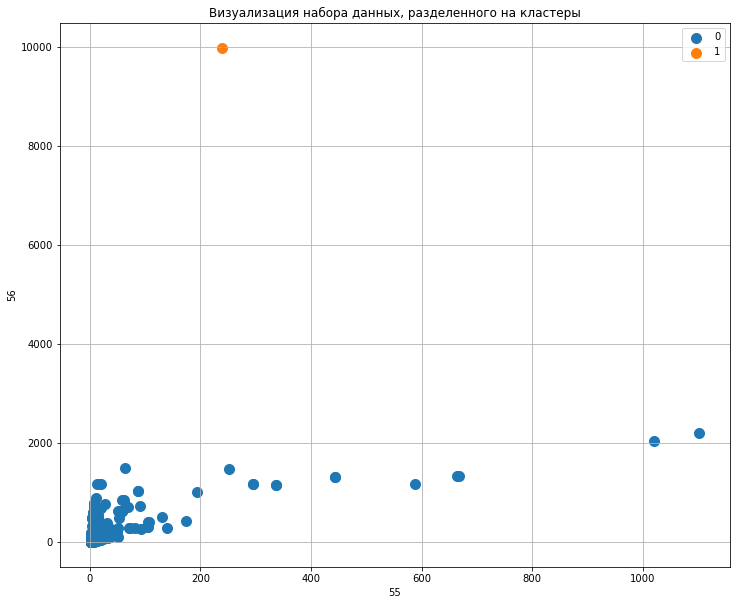

In [75]:
# кластеризация k-means 
from sklearn.cluster import KMeans

model_kmeans = KMeans(n_clusters=2)
model_kmeans.fit(X)
yhat = model_kmeans.predict(X)

plot_cluster(X,yhat)

labels_kmeans = model_kmeans.labels_

/Users/nkt1lyn/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_affinity_propagation.py:250: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn(
/Users/nkt1lyn/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_affinity_propagation.py:528: ConvergenceWarning: This model does not have any cluster centers because affinity propagation did not converge. Labeling every sample as '-1'.
  warnings.warn(


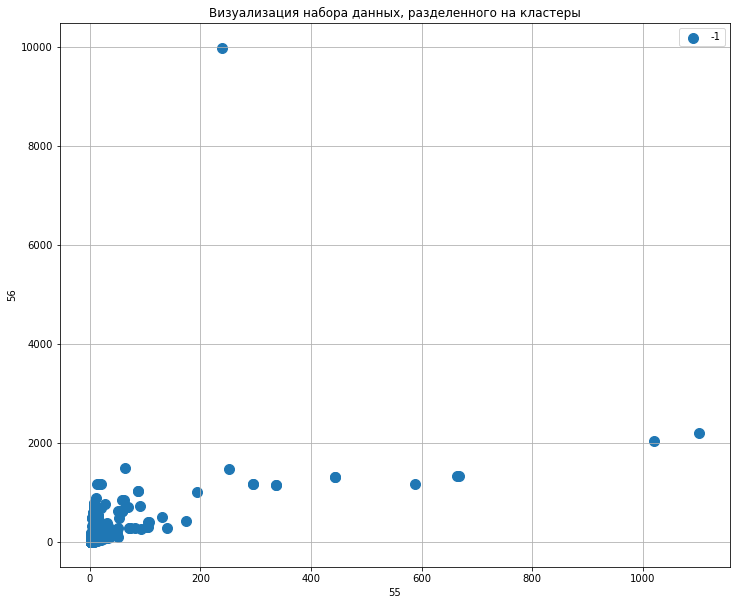

In [76]:
# кластеризация affinity propagation 
from sklearn.cluster import AffinityPropagation

# модель
model_ap = AffinityPropagation(damping=0.5,random_state=0, max_iter=3)

# тренируем модель
model_ap.fit(X)

# присваиваем метку каждой точке набора
yhat_ap = model_ap.predict(X)

plot_cluster(X,yhat_ap)

labels_ap = model_ap.labels_

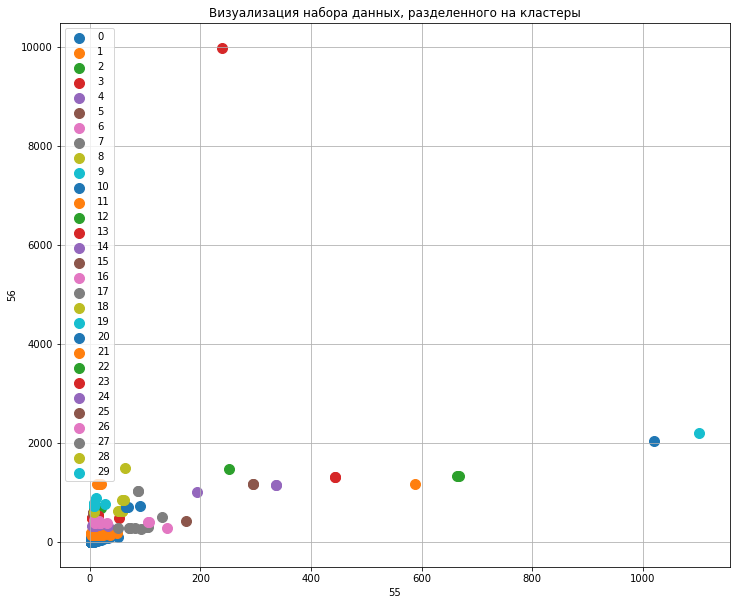

In [77]:
# кластеризация mean shift 
from sklearn.cluster import MeanShift

# модель
model_ms = MeanShift()

# тренируем модель и присваиваем метку каждой точке набора
yhat_ms = model_ms.fit_predict(X)

plot_cluster(X,yhat_ms)

labels_ms = model_ms.labels_

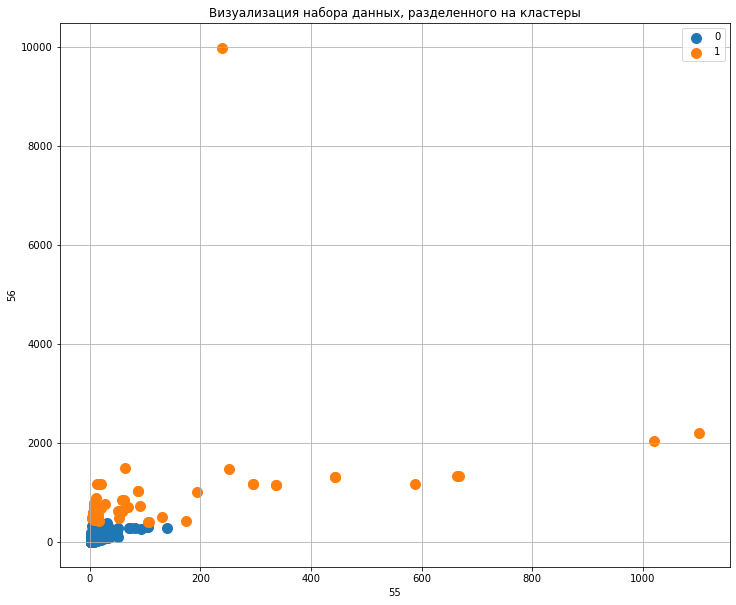

In [78]:
# кластеризация mini-batch k-means
from sklearn.cluster import MiniBatchKMeans

# модель
model_mk = MiniBatchKMeans(n_clusters=2)

# тренируем модель
model_mk.fit(X)

# присваиваем метку каждой точке набора
yhat_mk = model_mk.predict(X)

plot_cluster(X,yhat_mk)

labels_mk = model_mk.labels_


6.	Для каждого из алгоритмов кластеризации, указанных в индивидуальном задании, постройте матрицу сопряженности, используя функцию `contingency_matrix()` из scikit-learn, и найдите значения мер качества кластеризации, указанные в индивидуальном задании.  


In [79]:
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics import fowlkes_mallows_score
from sklearn.metrics import confusion_matrix

In [80]:
def counts_from_confusion(confusion):
    """
    Obtain TP, FN FP, and TN for each class in the confusion matrix
    """

    counts_list = []

    # Iterate through classes and store the counts
    for i in range(confusion.shape[0]):
        tp = confusion[i, i]

        fn_mask = np.zeros(confusion.shape)
        fn_mask[i, :] = 1
        fn_mask[i, i] = 0
        fn = np.sum(np.multiply(confusion, fn_mask))

        fp_mask = np.zeros(confusion.shape)
        fp_mask[:, i] = 1
        fp_mask[i, i] = 0
        fp = np.sum(np.multiply(confusion, fp_mask))

        tn_mask = 1 - (fn_mask + fp_mask)
        tn_mask[i, i] = 0
        tn = np.sum(np.multiply(confusion, tn_mask))

        counts_list.append({'Class': i,
                            'TP': tp,
                            'FN': fn,
                            'FP': fp,
                            'TN': tn})

    return counts_list

In [81]:
def purity(contingency_matrix):
    p = np.sum(np.amax(contingency_matrix, axis=0))/np.sum(contingency_matrix)
    return p

In [82]:
cont = contingency_matrix(Y, labels_kmeans)
conf = confusion_matrix(Y, labels_kmeans)

TP = conf[0][0]
FP = conf[0][1]
FN = conf[1][0]
TN = conf[1][1]

print('contingency_matrix\n', cont)
print('purity: ',purity(cont) )
print('fowlkes_mallows_score: ',fowlkes_mallows_score(Y, labels_kmeans))
print("TP =", TP, "\nFP =", FP, "\nFN =", FN, "\nTN =", TN)

contingency_matrix
 [[2788    0]
 [1812    1]]
purity:  0.6061725711801782
fowlkes_mallows_score:  0.7226574652454082
TP = 2788 
FP = 0 
FN = 1812 
TN = 1


In [83]:
cont = contingency_matrix(Y, labels_ap)
conf = confusion_matrix(Y, labels_ap)

TP = conf[0][0]
FP = conf[0][1]
FN = conf[1][0]
TN = conf[1][1]

print('contingency_matrix\n', cont)
print('purity: ',purity(cont) )
print('fowlkes_mallows_score: ',fowlkes_mallows_score(Y, labels_ap))
print("TP =", TP, "\nFP =", FP, "\nFN =", FN, "\nTN =", TN)

contingency_matrix
 [[2788]
 [1813]]
purity:  0.6059552271245382
fowlkes_mallows_score:  0.7227373006488753
TP = 0 
FP = 0 
FN = 2788 
TN = 0


In [84]:
cont = contingency_matrix(Y, labels_ms)
conf = confusion_matrix(Y, labels_ms)

print('contingency_matrix\n', cont)
print('purity: ',purity(cont) )
print('fowlkes_mallows_score: ',fowlkes_mallows_score(Y, labels_ms))
counts_from_confusion(conf)

contingency_matrix
 [[2758   27    0    0    2    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    1    0    0    0    0    0
     0    0]
 [1524  146   35   23   13    9   10    8    8    6    4    3    2    2
     2    2    2    2    2    1    1    1    0    1    1    1    1    1
     1    1]]
purity:  0.6624646815909585
fowlkes_mallows_score:  0.6982577774306993


[{'Class': 0, 'TP': 2758, 'FN': 30.0, 'FP': 1524.0, 'TN': 289.0},
 {'Class': 1, 'TP': 146, 'FN': 1667.0, 'FP': 27.0, 'TN': 2761.0},
 {'Class': 2, 'TP': 0, 'FN': 0.0, 'FP': 35.0, 'TN': 4566.0},
 {'Class': 3, 'TP': 0, 'FN': 0.0, 'FP': 23.0, 'TN': 4578.0},
 {'Class': 4, 'TP': 0, 'FN': 0.0, 'FP': 15.0, 'TN': 4586.0},
 {'Class': 5, 'TP': 0, 'FN': 0.0, 'FP': 9.0, 'TN': 4592.0},
 {'Class': 6, 'TP': 0, 'FN': 0.0, 'FP': 10.0, 'TN': 4591.0},
 {'Class': 7, 'TP': 0, 'FN': 0.0, 'FP': 8.0, 'TN': 4593.0},
 {'Class': 8, 'TP': 0, 'FN': 0.0, 'FP': 8.0, 'TN': 4593.0},
 {'Class': 9, 'TP': 0, 'FN': 0.0, 'FP': 6.0, 'TN': 4595.0},
 {'Class': 10, 'TP': 0, 'FN': 0.0, 'FP': 4.0, 'TN': 4597.0},
 {'Class': 11, 'TP': 0, 'FN': 0.0, 'FP': 3.0, 'TN': 4598.0},
 {'Class': 12, 'TP': 0, 'FN': 0.0, 'FP': 2.0, 'TN': 4599.0},
 {'Class': 13, 'TP': 0, 'FN': 0.0, 'FP': 2.0, 'TN': 4599.0},
 {'Class': 14, 'TP': 0, 'FN': 0.0, 'FP': 2.0, 'TN': 4599.0},
 {'Class': 15, 'TP': 0, 'FN': 0.0, 'FP': 2.0, 'TN': 4599.0},
 {'Class': 16, 'TP

In [85]:
cont = contingency_matrix(Y, labels_mk)
conf = confusion_matrix(Y, labels_mk)

print('contingency_matrix\n', cont)
print('purity: ',purity(cont) )
print('fowlkes_mallows_score: ',fowlkes_mallows_score(Y, labels_mk))
print("TP =", TP, "\nFP =", FP, "\nFN =", FN, "\nTN =", TN)

contingency_matrix
 [[2787    1]
 [1698  115]]
purity:  0.6307324494675071
fowlkes_mallows_score:  0.7146296154772233
TP = 0 
FP = 0 
FN = 2788 
TN = 0



7.	Определите алгоритм кластеризации, оптимальный с точки зрения меры качества кластеризации, указанной в индивидуальном задании.


оптимальный алгоритм - AffinityPropagation

fowlkes_mallows_score:  0.7227373006488753

Но с этим алгоритмом не получилось сделать больше классов, ни срезами, ни количеством итераций, а изображать один странно. Поэтому беру следующий - 


8.	Для оптимального алгоритма кластеризации из предыдущего пункта визуализируйте области принятия решения и набор данных в виде точек на плоскости с координатами, соответствующими двум признакам, отображая точки различных кластеров разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 

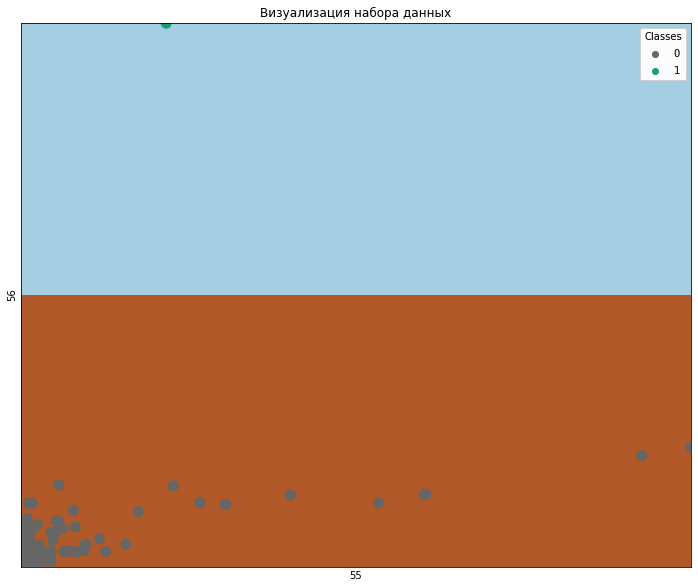

In [86]:
h = 0.8

x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = model_kmeans.fit_predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(12,10))
scatter = ax.scatter(X[:,0], X[:,1], s=100, c=yhat, cmap=plt.cm.Dark2_r);

ax.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

ax.set_xlabel("55")
ax.set_ylabel("56")
ax.set_title("Визуализация набора данных")
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_xticks(())
ax.set_yticks(())

legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)